In [169]:
import os
os.getcwd()

'C:\\Users\\dell'

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df = pd.read_csv("NFLX.csv")
df.head(20) 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
5,2010-01-11,7.660000,7.704286,7.528571,7.604286,7.604286,6783700
6,2010-01-12,7.528571,7.582857,7.451429,7.481429,7.481429,6330100
7,2010-01-13,7.612857,7.754286,7.558571,7.708571,7.708571,14422100
8,2010-01-14,7.518571,7.575714,7.270000,7.284286,7.284286,17685500
9,2010-01-15,7.245714,7.407143,7.232857,7.278571,7.278571,13031200


In [172]:
 df.drop(columns=['Open','High',"Low",'Close','Volume'], inplace=True)

In [173]:
df.head()

,Date,Adj Close
0,2010-01-04,7.640000
1,2010-01-05,7.358571
2,2010-01-06,7.617143
3,2010-01-07,7.485714
4,2010-01-08,7.614286


In [174]:
df.rename(columns={'Adj Close':'Final Price'},inplace = True)
df

,Date,Final Price
0,2010-01-04,7.640000
1,2010-01-05,7.358571
2,2010-01-06,7.617143
3,2010-01-07,7.485714
4,2010-01-08,7.614286
...,...,...
3114,2022-05-17,190.559998
3115,2022-05-18,177.190002
3116,2022-05-19,183.479996
3117,2022-05-20,186.350006


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3119 non-null   object 
 1   Final Price  3119 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.9+ KB


In [176]:
df['Date'] = pd.to_datetime(df['Date']) # converting into Date time datatype

In [177]:
df.dtypes

Date           datetime64[ns]
Final Price           float64
dtype: object

In [178]:
# As our daily data is irregular, so we will be converting into monthly data

df['Month'] = df['Date'].dt.to_period('M')

In [179]:
df

,Date,Final Price,Month
0,2010-01-04,7.640000,2010-01
1,2010-01-05,7.358571,2010-01
2,2010-01-06,7.617143,2010-01
3,2010-01-07,7.485714,2010-01
4,2010-01-08,7.614286,2010-01
...,...,...,...
3114,2022-05-17,190.559998,2022-05
3115,2022-05-18,177.190002,2022-05
3116,2022-05-19,183.479996,2022-05
3117,2022-05-20,186.350006,2022-05


In [180]:
df = df.groupby('Month')['Final Price'].mean().reset_index()
df

,Month,Final Price
0,2010-01,7.559173
1,2010-02,9.061353
2,2010-03,10.148199
3,2010-04,12.803673
4,2010-05,14.558714
...,...,...
144,2022-01,487.853500
145,2022-02,400.986317
146,2022-03,366.791741
147,2022-04,297.414499


In [181]:
df['Month'] = df['Month'].dt.to_timestamp()

In [182]:
df.head(10)

,Month,Final Price
0,2010-01-01,7.559173
1,2010-02-01,9.061353
2,2010-03-01,10.148199
3,2010-04-01,12.803673
4,2010-05-01,14.558714
5,2010-06-01,16.665519
6,2010-07-01,16.039252
7,2010-08-01,17.558701
8,2010-09-01,21.353946
9,2010-10-01,22.851973


In [183]:
df.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

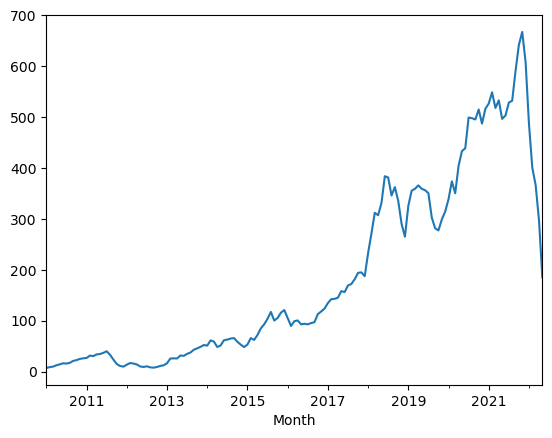

In [184]:
df['Final Price'].plot()

In [185]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


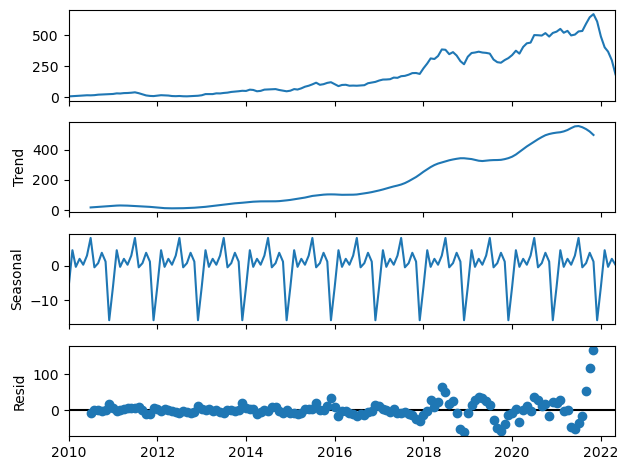

In [186]:
decompose = seasonal_decompose(df)
print(decompose.plot())

## check stationary

In [187]:
from statsmodels.tsa.stattools import adfuller

In [188]:
result = adfuller(df['Final Price'])
print(result)

(-1.5814039592640947, 0.49292782424085785, 1, 147, {'1%': -3.4756368462466662, '5%': -2.8814104466172608, '10%': -2.5773652982553568}, 1224.9518657801086)


In [189]:
pv = result[1]   # p-vale
pv

0.49292782424085785

In [190]:
# H0 = Data is not stationary
# H1 = Data is stationary

In [191]:
if pv>0.05:
    print("Data is not stationary")
    print("Null Hypothesis is accepted!")
else:
    print("Data is stationary")
    print("Alternate Hypothesis is accepted!")

Data is not stationary
Null Hypothesis is accepted!


# Make the data stationary

In [192]:
df['Final Price'] = np.log(df['Final Price'])
df

,Final Price
Month,
2010-01-01,2.022762
2010-02-01,2.204018
2010-03-01,2.317296
2010-04-01,2.549732
2010-05-01,2.678190
...,...
2022-01-01,6.190015
2022-02-01,5.993927
2022-03-01,5.904794


In [193]:
df.shape

(149, 1)

# Rolling Mean and Rolling Standard Deviation


In [194]:
rolling_mean = df['Final Price'].rolling(window = 3).mean()
rolling_std = df['Final Price'].rolling(window = 3).std()

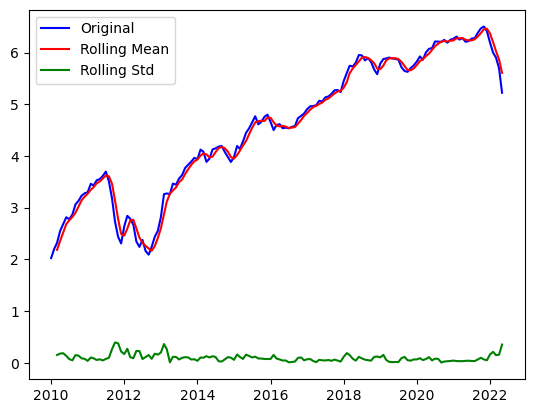

In [195]:
plt.plot(df['Final Price'], color = "blue", label='Original')
plt.plot(rolling_mean, color = "Red", label='Rolling Mean')
plt.plot(rolling_std, color = "Green", label='Rolling Std')
plt.legend()
plt.show()

In [196]:
diff_df = df['Final Price'] - rolling_mean 
# as the lines of rolling mean and std were not flat that means they are not still constant
diff_df = pd.DataFrame(diff_df)
diff_df

,Final Price
Month,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,0.135937
2010-04-01,0.192717
2010-05-01,0.163117
...,...
2022-01-01,-0.178172
2022-02-01,-0.204377
2022-03-01,-0.124785


In [197]:
diff_df.dropna(inplace =True)

In [198]:
diff_df = pd.DataFrame(diff_df)
diff_df

,Final Price
Month,
2010-03-01,0.135937
2010-04-01,0.192717
2010-05-01,0.163117
2010-06-01,0.132921
2010-07-01,0.019515
...,...
2022-01-01,-0.178172
2022-02-01,-0.204377
2022-03-01,-0.124785


In [199]:
roll_mean_diff = diff_df.rolling(window=3).mean()
roll_std_diff = diff_df.rolling(window=3).std()

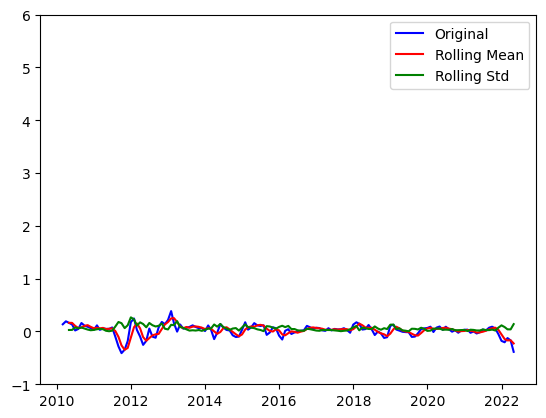

In [200]:
plt.plot(diff_df, color = "blue", label='Original')
plt.plot(roll_mean_diff, color = "Red", label='Rolling Mean')
plt.plot(roll_std_diff, color = "Green", label='Rolling Std')
plt.ylim(-1,6)
plt.legend()
plt.show()

# ADF Test

In [201]:
result = adfuller(diff_df)
result

(-4.743811249686006,
 6.957199317953613e-05,
 3,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -283.30303822543675)

In [202]:
pv = result[1]
pv  # 1.21 x 10 ^ -9 = 0.00000000121 

6.957199317953613e-05

In [203]:
if pv>0.05:
    print("Data is not stationary")
    print("Null Hypothesis is accepted!")
else:
    print("Data is stationary")
    print("Alternate Hypothesis is accepted!")

Data is stationary
Alternate Hypothesis is accepted!


# Spliting the Data

In [204]:
diff_df.shape

(147, 1)

In [205]:
train = diff_df.iloc[:51]
test = diff_df.iloc[51:]

# ARIMA : Auto Regressive Integrated Moving Average

In [206]:
from statsmodels.tsa.arima.model import ARIMA 

In [207]:
model = ARIMA(train, order=(2, 1, 2))    # p (past), d (how many time we dit it differencing),q (past errors)

C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [208]:
model = model.fit()

C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [209]:
diff_df['ARIMA_prediction'] = model.predict(start = 51, end = 148)    # test

In [210]:
diff_df

,Final Price,ARIMA_prediction
Month,,
2010-03-01,0.135937,NaN
2010-04-01,0.192717,NaN
2010-05-01,0.163117,NaN
2010-06-01,0.132921,NaN
2010-07-01,0.019515,NaN
...,...,...
2022-01-01,-0.178172,0.036562
2022-02-01,-0.204377,0.036562
2022-03-01,-0.124785,0.036562


In [211]:
diff_df = diff_df[~(diff_df == 'ARIMA_prediction').any(axis=1)]  # for DataFrame
diff_df

,Final Price,ARIMA_prediction
Month,,
2010-03-01,0.135937,NaN
2010-04-01,0.192717,NaN
2010-05-01,0.163117,NaN
2010-06-01,0.132921,NaN
2010-07-01,0.019515,NaN
...,...,...
2022-01-01,-0.178172,0.036562
2022-02-01,-0.204377,0.036562
2022-03-01,-0.124785,0.036562


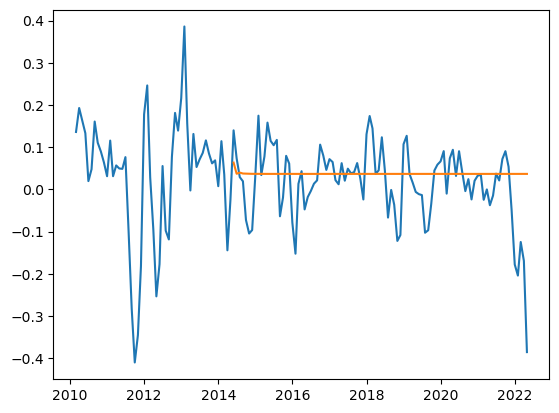

In [212]:
plt.plot(diff_df)
plt.show()


In [213]:
print(diff_df.tail(10))           # show last 10 rows
print(diff_df.index[-10:])       # check last 10 index values
print(diff_df.columns)           # confirm structure

            Final Price  ARIMA_prediction
Month                                    
2021-08-01     0.021008          0.036562
2021-09-01     0.071770          0.036562
2021-10-01     0.090348          0.036562
2021-11-01     0.053593          0.036562
2021-12-01    -0.048846          0.036562
2022-01-01    -0.178172          0.036562
2022-02-01    -0.204377          0.036562
2022-03-01    -0.124785          0.036562
2022-04-01    -0.169489          0.036562
2022-05-01    -0.385674          0.036562
DatetimeIndex(['2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01'],
              dtype='datetime64[ns]', name='Month', freq=None)
Index(['Final Price', 'ARIMA_prediction'], dtype='object')


In [214]:
forecast = model.forecast(steps=1)
forecast_value = forecast[0]  # or forecast.iloc[0] if forecast is a Series

C:\Users\dell\AppData\Local\Temp\ipykernel_14076\222304301.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_value = forecast[0]  # or forecast.iloc[0] if forecast is a Series


In [215]:
next_date = diff_df.index[-1] + pd.DateOffset(months=1)
diff_df.loc[next_date] = forecast_value

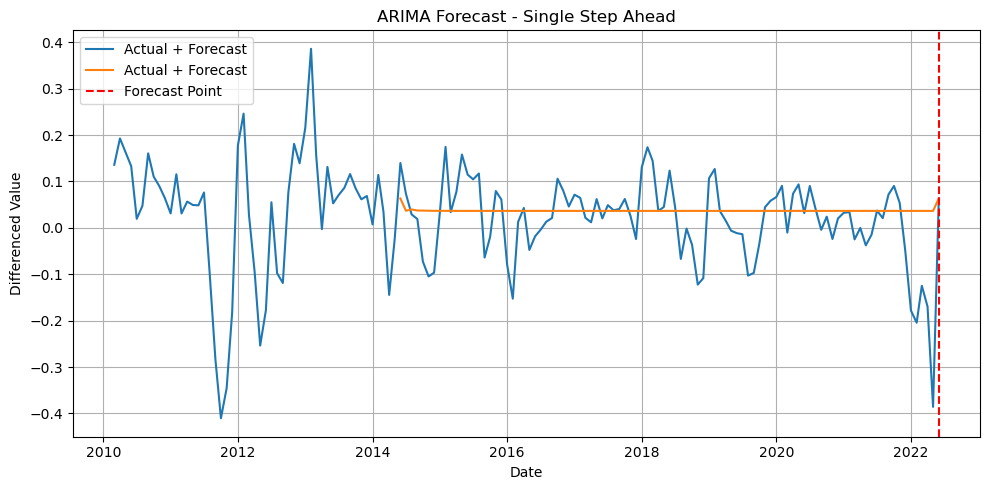

In [216]:
future_steps = 12
forecast = model.forecast(steps=future_steps)

# Create corresponding future date range
future_index = pd.date_range(start=diff_df.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='MS')

# Plot existing + future forecast
plt.figure(figsize=(10, 5))
plt.plot(diff_df, label="Actual + Forecast")
plt.axvline(x=next_date, color='red', linestyle='--', label='Forecast Point')

# Add axis labels and title
plt.xlabel("Date")
plt.ylabel("Differenced Value")
plt.title("ARIMA Forecast - Single Step Ahead")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


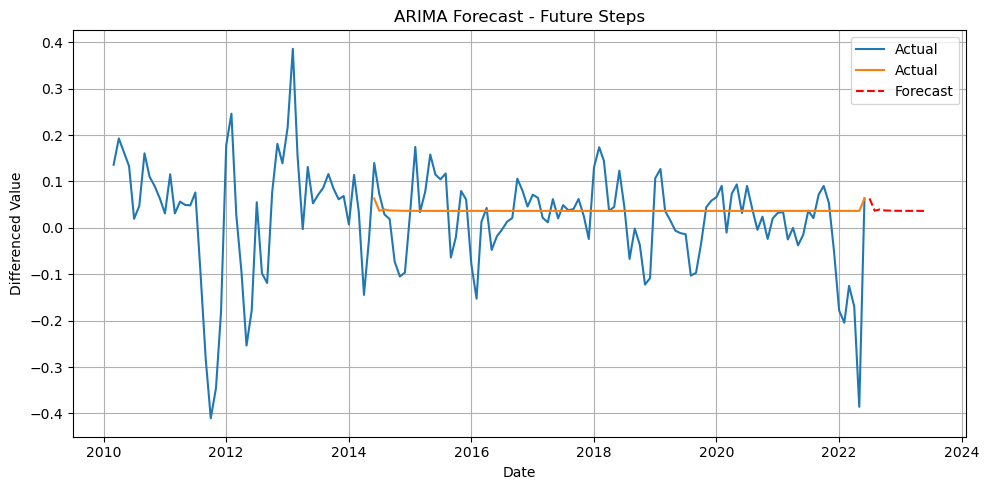

In [217]:
# forecast and future_index are defined as per previous steps
plt.figure(figsize=(10, 5))
plt.plot(diff_df, label="Actual")
plt.plot(future_index, forecast, color='red', linestyle='--', label="Forecast")

# Add axis labels and title
plt.xlabel("Date")
plt.ylabel("Differenced Value")
plt.title("ARIMA Forecast - Future Steps")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Data is very random (noise)

In [218]:
import itertools

In [219]:
p = range(8)
d = range(1,2)
q = range(8)

In [220]:
pdq = list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [221]:
from sklearn.metrics import mean_squared_error  # Evaluation metrics

In [222]:
rmse  = [] # to check the rmse score for each combination of pdq
order1 = []
start = len(train)
end = start + len(test) - 1
for p in pdq:
    model = ARIMA(train, order = p)
    model = model.fit()
    pred = model.predict(start = start, end = end) # test
    error = np.sqrt(mean_squared_error(test,pred))
    rmse.append(error)
    order1.append(p)

result = pd.DataFrame(data={'RMSE': rmse}, index=order1)
result.index.name = 'Order'

result.sort_values(by='RMSE')

C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No fr

,RMSE
Order,
"(6, 1, 7)",0.086345
"(6, 1, 0)",0.086482
"(6, 1, 1)",0.086561
"(5, 1, 0)",0.086574
"(4, 1, 1)",0.086617
...,...
"(7, 1, 4)",0.091625
"(6, 1, 5)",0.091696
"(4, 1, 4)",0.092187


# SARIMAX - Seasonal ARIMA with Exogeneous Variables - random pattern due to external factors

In [223]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [224]:
model = ARIMA(train, order=(2, 1, 2))    # p (past), d (how many time we dit it differencing),q (past errors)
model= model.fit()
diff_df['ARIMA_prediction'] = model.predict(start = 51, end = 148)    # test
diff_df

C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Final Price,ARIMA_prediction
Month,,
2010-03-01,0.135937,NaN
2010-04-01,0.192717,NaN
2010-05-01,0.163117,NaN
2010-06-01,0.132921,NaN
2010-07-01,0.019515,NaN
...,...,...
2022-02-01,-0.204377,0.036562
2022-03-01,-0.124785,0.036562
2022-04-01,-0.169489,0.036562


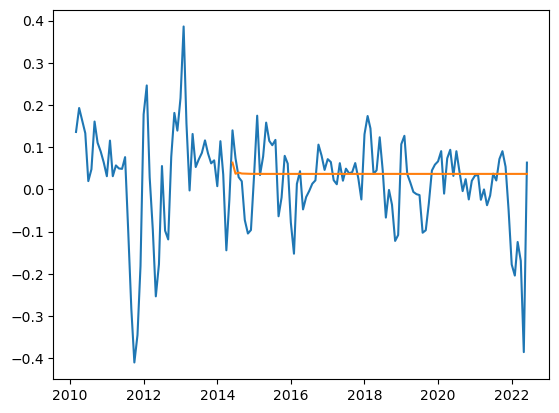

In [225]:
plt.plot(diff_df)
plt.show()

In [242]:
models = SARIMAX(train, order = (0,1,1), seasonal_order = (0,1,1,12))
models = models.fit()

C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [243]:
diff_df['SARIMAX_prediction'] = model.predict(start = 51, end = 148)    # test
diff_df

,Final Price,ARIMA_prediction,SARIMAX_prediction
Month,,,
2010-03-01,0.135937,NaN,NaN
2010-04-01,0.192717,NaN,NaN
2010-05-01,0.163117,NaN,NaN
2010-06-01,0.132921,NaN,NaN
2010-07-01,0.019515,NaN,NaN
...,...,...,...
2022-02-01,-0.204377,0.036562,0.036562
2022-03-01,-0.124785,0.036562,0.036562
2022-04-01,-0.169489,0.036562,0.036562


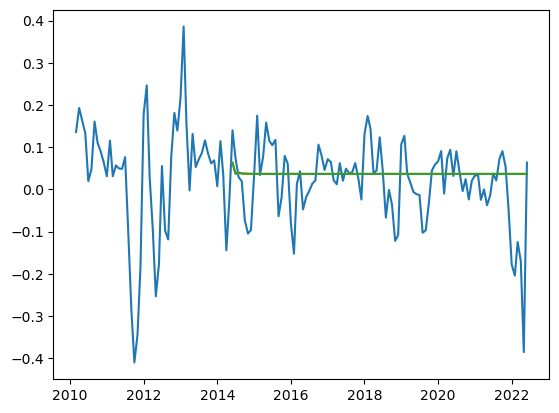

In [244]:
plt.plot(diff_df)
plt.show()

In [254]:
forecast_log = model.forecast(steps = 5)
forecast_log = pd.DataFrame(forecast_log)
forecast_log

,predicted_mean
2014-06-01,0.063313
2014-07-01,0.036897
2014-08-01,0.039681
2014-09-01,0.037443
2014-10-01,0.037154


In [255]:
last_log_value = df["Final Price"].iloc[-1]
last_log_value 

5.221449823065867

In [257]:
forecast_log_new = forecast_log + 5.221449823065867
forecast_log_new

,predicted_mean
2014-06-01,5.284763
2014-07-01,5.258347
2014-08-01,5.261131
2014-09-01,5.258893
2014-10-01,5.258603


In [262]:
actual = np.exp(forecast_log_new)
actual

,predicted_mean
2014-06-01,197.307396
2014-07-01,192.163573
2014-08-01,192.699371
2014-09-01,192.268564
2014-10-01,192.212864


In [263]:
# reverse the log

actual_pred = np.exp(forecast_log_new)
actual_pred

,predicted_mean
2014-06-01,197.307396
2014-07-01,192.163573
2014-08-01,192.699371
2014-09-01,192.268564
2014-10-01,192.212864


<Axes: >

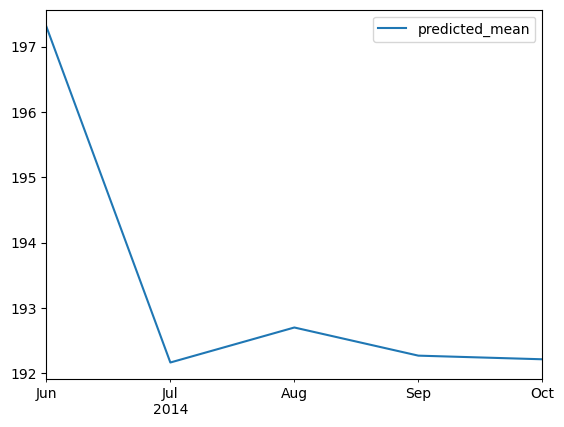

In [266]:
actual.plot()

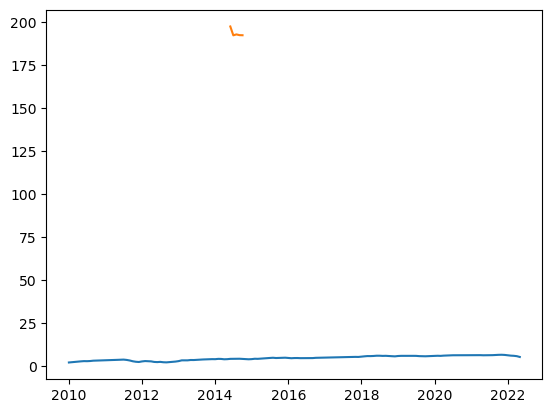

In [271]:
plt.plot(df['Final Price'])
plt.plot(actual)
plt.show()

In [273]:
df1 = pd.read_csv("NFLX.csv")
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600


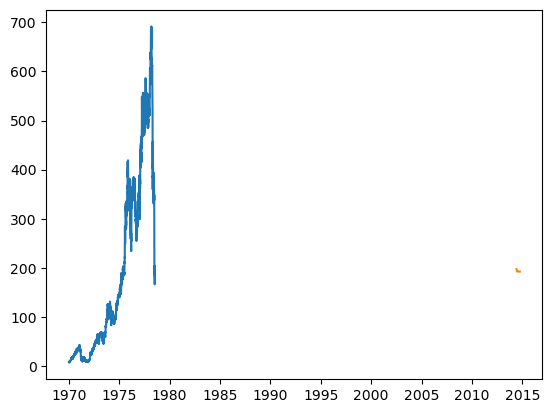

In [275]:
plt.plot(df1['Adj Close'])
plt.plot(actual)
plt.show()

##  Conclusion :
In this capstone project, we developed a time series forecasting model to predict the future stock prices of Netflix using historical stock data. The data was first preprocessed and transformed to achieve stationarity using techniques such as logarithmic transformation and differencing. We performed statistical tests like the Augmented Dickey-Fuller (ADF) test to confirm stationarity.

To capture both trend and seasonal patterns, we applied classical ARIMA and SARIMA models. The models were trained and evaluated using rolling statistics, residual analysis, and RMSE (Root Mean Squared Error). We also performed hyperparameter tuning via grid search across different combinations of (p, d, q) values to select the best-performing ARIMA configuration.

Finally, the best model was used to forecast future Netflix stock prices, and the predictions were visualized alongside actual stock values. This project not only demonstrated the full time series modeling pipeline but also highlighted the practical application of statistical modeling for financial forecasting.

Overall, the project illustrates how traditional time series models can be effectively applied to real-world stock market data for trend analysis and future prediction.